# Fraud Detection Deep Learning Model

<font color='red'> ! Please do not copy, cite, or distribute without permission. 

In this analysis, we will build a Neural Network model that detects anomalous transactions within Bitcoin transaction data. We will focus on developing deep learning models that correcly classify the risk level of each transaction: low - medium - high.
We will use Bitcoin transaction dataset prepared by Google BigQuery Public Dataset. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from ast import literal_eval
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.6.0


## 1. Set up data

In [3]:
df = pd.read_csv(f'../data/Bitcoin_Transactions_Labeled.csv')

In [4]:
df['indiv_input_add'] = df['indiv_input_add'].apply(literal_eval)
df['indiv_input_val'] = df['indiv_input_val'].apply(literal_eval)
df['indiv_output_add'] = df['indiv_output_add'].apply(literal_eval)
df['indiv_output_val'] = df['indiv_output_val'].apply(literal_eval)

In [5]:
df.head()

,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,...,outputs,indiv_input_add,indiv_input_val,indiv_output_add,indiv_output_val,prev_trans_hash,ratio,Labels,label,risk
0,007f78cc4b819704fd02e5d1d1a5c21eb207746044f665...,340,340,1,0,0000000000000000000f5a4bcfdda05be5adc5cae643f1...,697301,2021-08-24 02:30:55+00:00,2021-08-01,1,...,"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160...",[3EWcg3FYEnLRupA6PtH8Bqamsuq2A4JVrM],[0.02],[1HDWAto9mD4vwZkxE7RZ4nxvgYcA5vJQpG],[0.019993010000000002],['df418ffeddc8cc011fda4404643690cb2640eaa65e5c...,1.000000,0,0,0
1,0c0ebd481e117281a127d7c3d8754351f2c3ed56fa41c8...,258,258,1,0,0000000000000000000f5a4bcfdda05be5adc5cae643f1...,697301,2021-08-24 02:30:55+00:00,2021-08-01,1,...,"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160...",[15NfavcjCHzyJQSms7su5Bqq5ZDgmc2jhs],[0.0109557],"[1Puh5EdPdr9RKMekU49jVKtN2SSBsouc4s, 152D4kSk7...","[0.00325622, 0.0076440200000000005, 5e-05]",['f19c82bc66ab1229a33ff28edd00c45d2514c7c3beb3...,3.000000,0,0,0
2,f4e5e6fb196553485d989efb911467c4cbd6dcd289a63b...,406,406,1,0,0000000000000000000f5a4bcfdda05be5adc5cae643f1...,697301,2021-08-24 02:30:55+00:00,2021-08-01,2,...,"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160...","[1CjQuhNiN4gwTBCDMoq3d9XzpbgA3Zv3tf, 1A5r1HqZr...","[0.00381094, 0.03790496]","[15FnEkUVAngt7RSdbFmosrnd7E7VCW3P4Q, 3M1sNvhcY...","[0.00018589, 0.02230642, 0.019215]",['4b3e9741022d4c3951ed8c6ab0e175f0fac1b38b6a7f...,1.500000,0,0,0
3,c49e7d1304374a4a23a8868c2d9aaef4151aed6fe0db1f...,520,277,2,0,0000000000000000000f5a4bcfdda05be5adc5cae643f1...,697301,2021-08-24 02:30:55+00:00,2021-08-01,3,...,"[{'index': 0, 'script_asm': '0 35f0931436d1900...","[bc1qxhcfx9pk6xgqkpzxjq2c0rpwd4v9cg4fnpedcw, b...","[0.04070465, 0.01015633, 0.03276862]","[bc1qxhcfx9pk6xgqkpzxjq2c0rpwd4v9cg4fnpedcw, 3...","[0.026602610000000002, 0.05697398]",['a3a0c56e68ac6dc059e992cf06f63e3efc81e2535041...,0.666667,0,0,0
4,2243af30cea4481e64699cbd6886a1bc3f1ad16a40973f...,370,205,1,0,0000000000000000000f5a4bcfdda05be5adc5cae643f1...,697301,2021-08-24 02:30:55+00:00,2021-08-01,1,...,"[{'index': 0, 'script_asm': 'OP_HASH160 d8d400...",[3QTUxAKmHqLAkvAjSvPxYoi5yUVRPQm2Cx],[1.4448668900000001],"[3MTVrAM6rGWraYFBAuyBPM85utuiz1wD4x, 3QTUxAKmH...","[0.00520464, 1.43963135]",['102f0f21400e126c100c3a36ed821719f8b75adcb1c5...,2.000000,0,0,0


In [6]:
df.shape

(10000, 26)

In [7]:
#No null values in the data.
df.isnull().sum()

hash                     0
size                     0
virtual_size             0
version                  0
lock_time                0
block_hash               0
block_number             0
block_timestamp          0
block_timestamp_month    0
input_count              0
output_count             0
input_value              0
output_value             0
is_coinbase              0
fee                      0
inputs                   0
outputs                  0
indiv_input_add          0
indiv_input_val          0
indiv_output_add         0
indiv_output_val         0
prev_trans_hash          0
ratio                    0
Labels                   0
label                    0
risk                     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hash                   10000 non-null  object 
 1   size                   10000 non-null  int64  
 2   virtual_size           10000 non-null  int64  
 3   version                10000 non-null  int64  
 4   lock_time              10000 non-null  int64  
 5   block_hash             10000 non-null  object 
 6   block_number           10000 non-null  int64  
 7   block_timestamp        10000 non-null  object 
 8   block_timestamp_month  10000 non-null  object 
 9   input_count            10000 non-null  int64  
 10  output_count           10000 non-null  int64  
 11  input_value            10000 non-null  float64
 12  output_value           10000 non-null  float64
 13  is_coinbase            10000 non-null  bool   
 14  fee                    10000 non-null  float64
 15  inp

In [9]:
df['risk'].value_counts()

0    9687
1     229
2      84
Name: risk, dtype: int64

## 2. Preprocessing

### Feature selection

In [10]:
df.columns

Index(['hash', 'size', 'virtual_size', 'version', 'lock_time', 'block_hash',
       'block_number', 'block_timestamp', 'block_timestamp_month',
       'input_count', 'output_count', 'input_value', 'output_value',
       'is_coinbase', 'fee', 'inputs', 'outputs', 'indiv_input_add',
       'indiv_input_val', 'indiv_output_add', 'indiv_output_val',
       'prev_trans_hash', 'ratio', 'Labels', 'label', 'risk'],
      dtype='object')

In [11]:
df = df[['size', 'virtual_size', 'version', 'lock_time', 
        'block_number', 'input_count', 'output_count', 
         'input_value', 'output_value',
         'is_coinbase', 'fee', 'ratio', 'risk']]

numeric_features = ['size', 'virtual_size', 'lock_time', 'block_number', 
                    'input_count', 'output_count', 'input_value', 'output_value',
                    'fee', 'ratio']

binary_features = ['version', 'is_coinbase']


categorical_label = ['risk']

In [12]:
# Consolidate data types
for col in numeric_features + binary_features:
    df[col] = df[col].astype('float32')
    
#for col in date_features:
#   df[col] = df[col].apply(pd.to_datetime, infer_datetime_format=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   size          10000 non-null  float32
 1   virtual_size  10000 non-null  float32
 2   version       10000 non-null  float32
 3   lock_time     10000 non-null  float32
 4   block_number  10000 non-null  float32
 5   input_count   10000 non-null  float32
 6   output_count  10000 non-null  float32
 7   input_value   10000 non-null  float32
 8   output_value  10000 non-null  float32
 9   is_coinbase   10000 non-null  float32
 10  fee           10000 non-null  float32
 11  ratio         10000 non-null  float32
 12  risk          10000 non-null  int64  
dtypes: float32(12), int64(1)
memory usage: 547.0 KB


### Train - Test Split

In [14]:
# Train - Test Split 
train_df, test_df = train_test_split(df, test_size=0.3)
train_df, val_df = train_test_split(train_df, test_size=0.3)

In [15]:
train_df.head()

,size,virtual_size,version,lock_time,block_number,input_count,output_count,input_value,output_value,is_coinbase,fee,ratio,risk
1413,225.0,144.0,2.0,0.0,697300.0,1.0,2.0,0.082472,0.082469,0.0,336.0,2.0,0
8446,224.0,142.0,1.0,0.0,697298.0,1.0,2.0,86.576096,86.576096,0.0,349.0,2.0,0
5482,226.0,226.0,1.0,0.0,697299.0,1.0,2.0,2.916375,2.916365,0.0,1000.0,2.0,0
8010,225.0,225.0,1.0,0.0,697298.0,1.0,2.0,0.465251,0.465214,0.0,3686.0,2.0,0
2125,193.0,111.0,1.0,0.0,697300.0,1.0,1.0,0.002240,0.002237,0.0,333.0,1.0,0


### Normalization

In [16]:
# Create a normalizer 
normalizer = preprocessing.Normalization()
normalizer.adapt(train_df[numeric_features].values)

### Prepare datasets

In [17]:
def dataset_prep(df):
    df[numeric_features] = normalizer(df[numeric_features].values)
    df_X = df.iloc[:, :-1]
    df_Y = pd.get_dummies(df.risk, prefix='risk')
    
    df_X = np.array(df_X).astype('float32')
    df_Y = np.array(df_Y).astype('float32')
    
    df_X = np.reshape(df_X, (df_X.shape[0],1,df_X.shape[1]))
    
    return df_X, df_Y

In [18]:
train_X, train_Y = dataset_prep(train_df)
val_X, val_Y = dataset_prep(val_df)
test_X, test_Y = dataset_prep(test_df)

<ipython-input-17-500b12dbe40b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_features] = normalizer(df[numeric_features].values)
C:\Users\HKo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


## 3. Modeling & Evaluation

In [19]:
# Set metrics
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [20]:
# Set callback
class set_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.998):
            print('\nReached 99.8% accuracy so cancelling training.')
            self.model.stop_training = True
callbacks = set_callback()

### CNN

In [21]:
# Create a model
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

model_cnn = keras.Sequential()
model_cnn.add(layers.Conv1D(64, 1, activation='relu'))
model_cnn.add(layers.Dropout(0.2))
model_cnn.add(layers.GlobalMaxPooling1D())
model_cnn.add(layers.Dense(3, activation='softmax'))


model_cnn.compile(optimizer = tf.keras.optimizers.Adam(), 
                  loss=tf.keras.losses.categorical_crossentropy, 
                  metrics=METRICS)

In [22]:
# Train the model 
epochs = 25
batch_size = 16

history = model_cnn.fit(train_X, train_Y, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data = (val_X, val_Y),
                        callbacks=[callbacks]
                       )

Epoch 1/25
307/307 [==============================] - 3s 4ms/step - loss: 0.2312 - tp: 4489.0000 - fp: 76.0000 - tn: 9724.0000 - fn: 411.0000 - accuracy: 0.9669 - precision: 0.9834 - recall: 0.9161 - auc: 0.9917 - val_loss: 0.0334 - val_tp: 2081.0000 - val_fp: 11.0000 - val_tn: 4189.0000 - val_fn: 19.0000 - val_accuracy: 0.9952 - val_precision: 0.9947 - val_recall: 0.9910 - val_auc: 0.9999
Epoch 2/25
307/307 [==============================] - 1s 2ms/step - loss: 0.0333 - tp: 4856.0000 - fp: 30.0000 - tn: 9770.0000 - fn: 44.0000 - accuracy: 0.9950 - precision: 0.9939 - recall: 0.9910 - auc: 0.9995 - val_loss: 0.0164 - val_tp: 2091.0000 - val_fp: 7.0000 - val_tn: 4193.0000 - val_fn: 9.0000 - val_accuracy: 0.9975 - val_precision: 0.9967 - val_recall: 0.9957 - val_auc: 1.0000
Epoch 3/25
307/307 [==============================] - 1s 2ms/step - loss: 0.0219 - tp: 4862.0000 - fp: 30.0000 - tn: 9770.0000 - fn: 38.0000 - accuracy: 0.9954 - precision: 0.9939 - recall: 0.9922 - auc: 0.9997 - val_

In [23]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 64)             832       
_________________________________________________________________
dropout (Dropout)            (None, 1, 64)             0         
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________


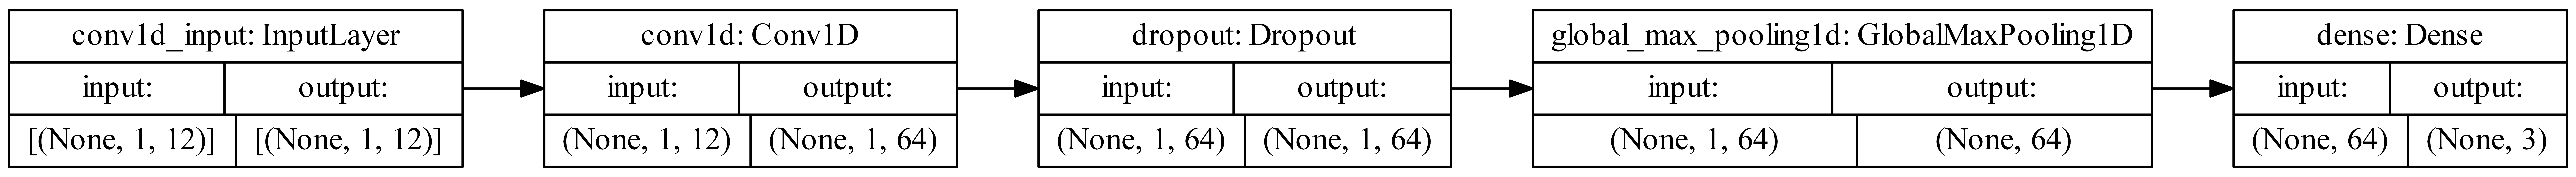

In [24]:
keras.utils.plot_model(model_cnn, show_shapes=True, show_layer_names=True, rankdir="LR", dpi=1000)

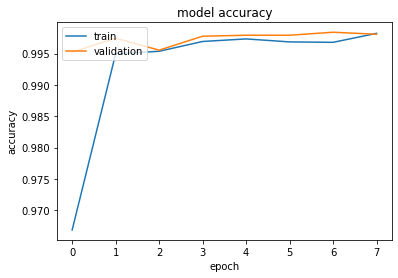

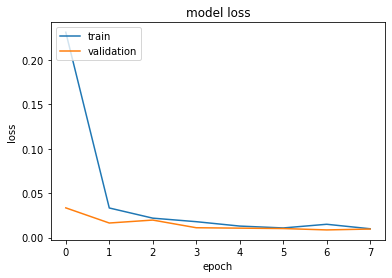

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
loss, tp, fp, tn, fn, accuracy, precision, recall, auc = model_cnn.evaluate(test_X, test_Y, verbose=1)

94/94 [==============================] - 0s 1ms/step - loss: 0.0090 - tp: 2991.0000 - fp: 8.0000 - tn: 5992.0000 - fn: 9.0000 - accuracy: 0.9981 - precision: 0.9973 - recall: 0.9970 - auc: 1.0000  


### RNN

In [27]:
# Create an RNN model
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

model_rnn = keras.Sequential()
model_rnn.add(layers.SimpleRNN(64))
model_rnn.add(layers.Dropout(0.2))
model_rnn.add(layers.Dense(3, activation='softmax'))

model_rnn.compile(optimizer = tf.keras.optimizers.Adam(), 
                  loss=tf.keras.losses.categorical_crossentropy, 
                  metrics=METRICS)

epochs = 25
batch_size = 16

In [28]:
# Train the model 
epochs = 25
batch_size = 16

history = model_rnn.fit(train_X, train_Y, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data = (val_X, val_Y),
                        callbacks=[callbacks]
                       )

Epoch 1/25
307/307 [==============================] - 3s 4ms/step - loss: 0.1198 - tp: 7693.0000 - fp: 43.0000 - tn: 15757.0000 - fn: 207.0000 - accuracy: 0.9895 - precision: 0.9944 - recall: 0.9738 - auc: 0.9993 - val_loss: 0.0201 - val_tp: 2091.0000 - val_fp: 4.0000 - val_tn: 4196.0000 - val_fn: 9.0000 - val_accuracy: 0.9979 - val_precision: 0.9981 - val_recall: 0.9957 - val_auc: 1.0000
Epoch 2/25
307/307 [==============================] - 1s 2ms/step - loss: 0.0178 - tp: 4874.0000 - fp: 15.0000 - tn: 9785.0000 - fn: 26.0000 - accuracy: 0.9972 - precision: 0.9969 - recall: 0.9947 - auc: 0.9998 - val_loss: 0.0117 - val_tp: 2093.0000 - val_fp: 5.0000 - val_tn: 4195.0000 - val_fn: 7.0000 - val_accuracy: 0.9981 - val_precision: 0.9976 - val_recall: 0.9967 - val_auc: 1.0000
Epoch 3/25
307/307 [==============================] - 1s 2ms/step - loss: 0.0130 - tp: 4877.0000 - fp: 19.0000 - tn: 9781.0000 - fn: 23.0000 - accuracy: 0.9971 - precision: 0.9961 - recall: 0.9953 - auc: 0.9998 - val_l

In [29]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                4928      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 5,123
Trainable params: 5,123
Non-trainable params: 0
_________________________________________________________________


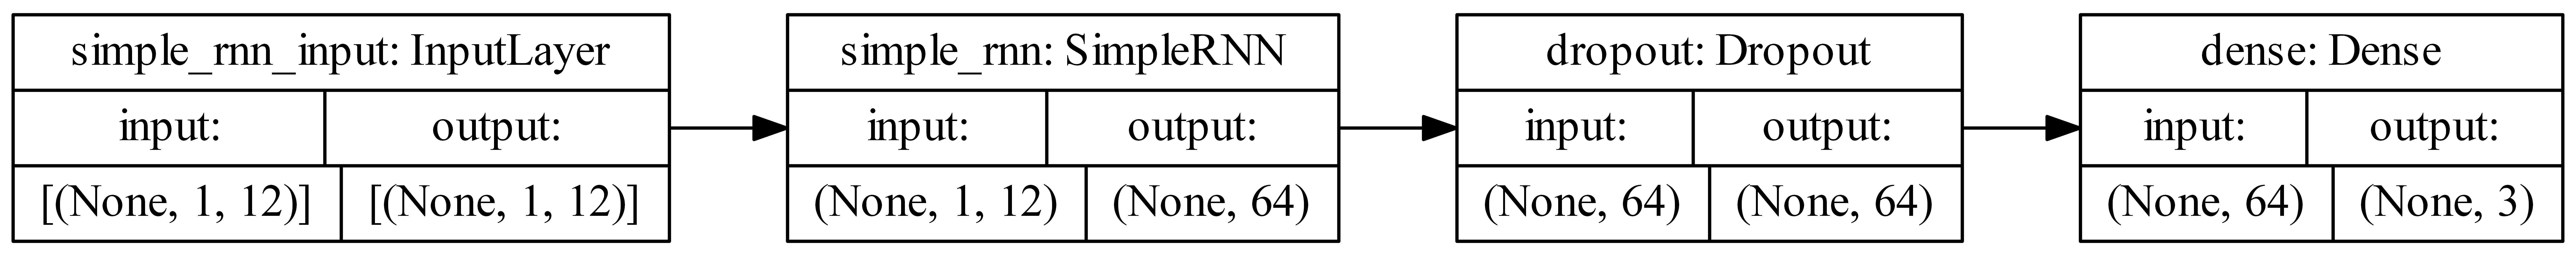

In [30]:
keras.utils.plot_model(model_rnn, show_shapes=True, show_layer_names=True, rankdir="LR", dpi=1000)

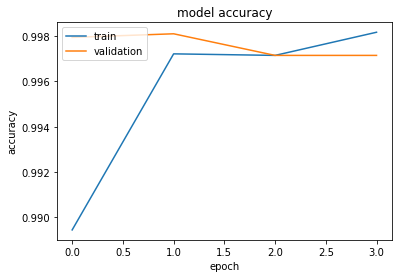

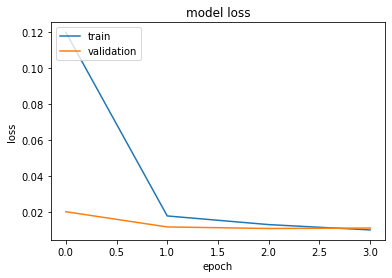

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [32]:
loss, tp, fp, tn, fn, accuracy, precision, recall, auc = model_rnn.evaluate(test_X, test_Y, verbose=1)

94/94 [==============================] - 0s 1ms/step - loss: 0.0078 - tp: 2994.0000 - fp: 6.0000 - tn: 5994.0000 - fn: 6.0000 - accuracy: 0.9987 - precision: 0.9980 - recall: 0.9980 - auc: 1.0000


### LSTM

In [32]:
# Create an LSTM model
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

model_lstm = keras.Sequential()
model_lstm.add(layers.LSTM(64))
model_lstm.add(layers.Dropout(0.2))
model_lstm.add(layers.Dense(3, activation='softmax'))

model_lstm.compile(optimizer = tf.keras.optimizers.Adam(), 
                   loss=tf.keras.losses.categorical_crossentropy, 
                   metrics=METRICS)

In [33]:
# Train the model 
epochs = 25
batch_size = 16

history = model_lstm.fit(train_X, train_Y, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data = (val_X, val_Y),
                        callbacks=[callbacks]
                       )

Epoch 1/25
307/307 [==============================] - 4s 6ms/step - loss: 0.2598 - tp: 6253.0000 - fp: 11.0000 - tn: 13989.0000 - fn: 747.0000 - accuracy: 0.9639 - precision: 0.9982 - recall: 0.8933 - auc: 0.9993 - val_loss: 0.0284 - val_tp: 2092.0000 - val_fp: 3.0000 - val_tn: 4197.0000 - val_fn: 8.0000 - val_accuracy: 0.9983 - val_precision: 0.9986 - val_recall: 0.9962 - val_auc: 1.0000
Epoch 2/25
307/307 [==============================] - 1s 3ms/step - loss: 0.0192 - tp: 4877.0000 - fp: 9.0000 - tn: 9791.0000 - fn: 23.0000 - accuracy: 0.9978 - precision: 0.9982 - recall: 0.9953 - auc: 1.0000 - val_loss: 0.0124 - val_tp: 2093.0000 - val_fp: 5.0000 - val_tn: 4195.0000 - val_fn: 7.0000 - val_accuracy: 0.9981 - val_precision: 0.9976 - val_recall: 0.9967 - val_auc: 1.0000
Epoch 3/25
307/307 [==============================] - 1s 3ms/step - loss: 0.0110 - tp: 4885.0000 - fp: 10.0000 - tn: 9790.0000 - fn: 15.0000 - accuracy: 0.9983 - precision: 0.9980 - recall: 0.9969 - auc: 1.0000 - val_lo

In [34]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                19712     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 19,907
Trainable params: 19,907
Non-trainable params: 0
_________________________________________________________________


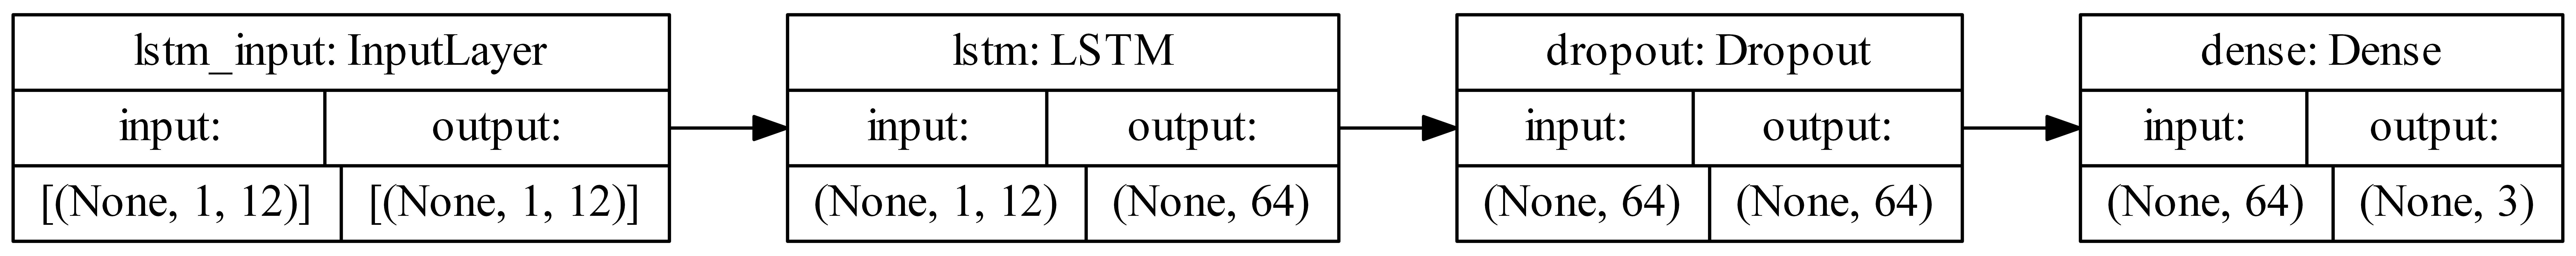

In [35]:
keras.utils.plot_model(model_lstm, show_shapes=True, show_layer_names=True, rankdir="LR", dpi=1000)

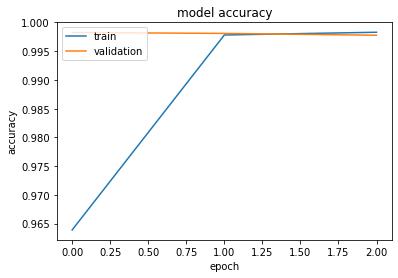

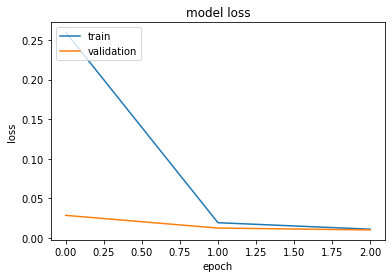

In [36]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
loss, tp, fp, tn, fn, accuracy, precision, recall, auc = model_lstm.evaluate(test_X, test_Y, verbose=1)

94/94 [==============================] - 0s 2ms/step - loss: 0.0079 - tp: 2993.0000 - fp: 6.0000 - tn: 5994.0000 - fn: 7.0000 - accuracy: 0.9986 - precision: 0.9980 - recall: 0.9977 - auc: 1.0000


## 4. Save Model

In [39]:
##model_rnn.save(f'../models/fraud_detection_rnn')

INFO:tensorflow:Assets written to: ../models/fraud_detection_rnn\assets
